In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
#My code
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import sparse
from scipy.sparse.linalg import spsolve

#Defining Parameters

#Thermal diffusivity
a = 2*10**(-5)

#Plate width
L = 2.0

#Plate height 
H = 1

#Time Limit 
t_max = 25000

#Initial Temperature Conditions
T_i = 0.0

#Boundary Temperature Conditions
T_top = 80.0
T_bottom = 0.0
T_left = 0.0
T_right = 0.0

#Domain Discretization
dx = 0.1
dy = 0.1
dt = 0.1
d_x = (a*dt)/dx**2
d_y = (a*dt)/dy**2
n_x = int(L/dx) + 1
n_y = int(H/dy) + 1
n_t = int(t_max/dt)

#Temperature Matrix
T = np.ones((n_y, n_x))
T[:,:] = T_i
T[-1,:] = T_top
T[0,:] = T_bottom
T[1:,0] = T_left
T[1:,-1] = T_right
T_centre = []

#Domain Definition
x = np.linspace(0.0, L, n_x)
y = np.linspace(0.0, H, n_y)
X,Y = np.meshgrid(x,y)


#ADI algorithm
#Solve along x direction
upper_off_diagonal = -(d_x/2)*np.ones(n_x-3)
main_diagonal = (1+2*(d_x/2))*np.ones(n_x-2)
lower_off_diagonal = -(d_x/2)*np.ones(n_x-3)
diagonals = [main_diagonal, lower_off_diagonal, upper_off_diagonal]
A_x = sparse.diags(diagonals, [0, -1, 1], shape=(n_x-2, n_x-2), format='csr')
b_x = np.zeros(n_x-2)

#Solve along y direction
upper_off_diagonal = -(d_y/2)*np.ones(n_y-3)
main_diagonal = (1+2*(d_y/2))*np.ones(n_y-2)
lower_off_diagonal = -(d_y/2)*np.ones(n_y-3)
diagonals = [main_diagonal, lower_off_diagonal, upper_off_diagonal]
A_y = sparse.diags(diagonals, [0, -1, 1], shape=(n_y-2, n_y-2), format='csr')
b_y = np.zeros(n_y-2)


#Defining Main Loop
for k in range(1, n_t):
  for j in range(1,n_y-1):
    for i in range(1,n_x-1):
      if i == 1:
        b_x[0] = (d_x/2)*T[j,i-1] + (T[j,i] + (d_y/2)*(T[j+1,i] - 2*T[j,i] + T[j-1, i])) #RHS of the 1st equation
      elif i == n_x-2:
        b_x[n_x-3] = (d_x/2)*T[j,i+1] + (T[j,i] +  (d_y/2)*(T[j+1,i] - 2*T[j,i] + T[j-1, i])) #RHS of the last equation
      else:
        b_x[i-1] = (T[j,i] + (d_y/2)*(T[j+1,i] - 2*T[j, i] + T[j-1, i])) #RHS of equations from b[1] to b[n_x-3]
      
    T[j, 1:n_x-1] = spsolve(A_x, b_x) #Solving Au = B for the interior grid points
  
  for i in range(1,n_x-1):
    for j in range(1, n_y-1):
      if j == 1:
          b_y[0] = (d_y/2)*T[j-1,i] + (T[j, i] +  (d_x/2)*(T[j, i+1] - 2*T[j,i] + T[j,i-1]))
      elif j == n_y-2:
          b_y[n_y-3] = (d_y/2)*T[j+1, i] + (T[j, i] + (d_x/2)*(T[j, i+1] - 2*T[j, i] + T[j, i-1]))
      else:
          b_y[j-1] = (T[j, i] + (d_x/2)*(T[j, i+1] - 2*T[j, i] + T[j, i-1]))
    
    T[1:n_y-1, i] = spsolve(A_y, b_y)

  T_centre.append(T[int((1/2)/dy)+1, int((2/2)/dx)])


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#My code
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import sparse
from scipy.sparse.linalg import spsolve

#Defining Parameters

#Thermal diffusivity
a = 2*10**(-5)

#Plate width
L = 2.0

#Plate height 
H = 1

#Time Limit 
t_max = 25000

#Initial Temperature Conditions
T_i = 0.0

#Boundary Temperature Conditions
T_top = 80.0
T_bottom = 0.0
T_left = 0.0
T_right = 0.0

#Domain Discretization
dx1 = 0.05
dy1 = 0.05
dt = 0.1
d_x1 = (a*dt)/dx1**2
d_y1 = (a*dt)/dy1**2
n_x1 = int(L/dx1) + 1
n_y1 = int(H/dy1) + 1
n_t = int(t_max/dt)

#Temperature Matrix
T1 = np.ones((n_y1, n_x1))
T1[:,:] = T_i
T1[-1,:] = T_top
T1[0,:] = T_bottom
T1[1:,0] = T_left
T1[1:,-1] = T_right
T_centre1 = []

#Domain Definition
x1 = np.linspace(0.0, L, n_x1)
y1 = np.linspace(0.0, H, n_y1)
X1,Y1 = np.meshgrid(x1,y1)


#ADI algorithm
#Solve along x direction
upper_off_diagonal = -(d_x/2)*np.ones(n_x1-3)
main_diagonal = (1+2*(d_x/2))*np.ones(n_x1-2)
lower_off_diagonal = -(d_x/2)*np.ones(n_x1-3)
diagonals = [main_diagonal, lower_off_diagonal, upper_off_diagonal]
A_x1 = sparse.diags(diagonals, [0, -1, 1], shape=(n_x1-2, n_x1-2), format='csr')
b_x1 = np.zeros(n_x1-2)

#Solve along y direction
upper_off_diagonal = -(d_y1/2)*np.ones(n_y1-3)
main_diagonal = (1+2*(d_y1/2))*np.ones(n_y1-2)
lower_off_diagonal = -(d_y1/2)*np.ones(n_y1-3)
diagonals = [main_diagonal, lower_off_diagonal, upper_off_diagonal]
A_y1 = sparse.diags(diagonals, [0, -1, 1], shape=(n_y1-2, n_y1-2), format='csr')
b_y1 = np.zeros(n_y1-2)


#Defining Main Loop
for k in range(1, n_t):
  for j in range(1,n_y1-1):
    for i in range(1,n_x1-1):
      if i == 1:
        b_x1[0] = (d_x1/2)*T1[j,i-1] + (T1[j,i] + (d_y1/2)*(T1[j+1,i] - 2*T1[j,i] + T1[j-1, i])) #RHS of the 1st equation
      elif i == n_x1-2:
        b_x1[n_x1-3] = (d_x1/2)*T1[j,i+1] + (T1[j,i] +  (d_y1/2)*(T1[j+1,i] - 2*T1[j,i] + T1[j-1, i])) #RHS of the last equation
      else:
        b_x1[i-1] = (T1[j,i] + (d_y1/2)*(T1[j+1,i] - 2*T1[j, i] + T1[j-1, i])) #RHS of equations from b[1] to b[n_x-3]
      
    T1[j, 1:n_x1-1] = spsolve(A_x1, b_x1) #Solving Au = B for the interior grid points
  
  for i in range(1,n_x1-1):
    for j in range(1, n_y1-1):
      if j == 1:
          b_y1[0] = (d_y1/2)*T1[j-1,i] + (T1[j, i] +  (d_x1/2)*(T1[j, i+1] - 2*T1[j,i] + T1[j,i-1]))
      elif j == n_y1-2:
          b_y1[n_y1-3] = (d_y1/2)*T1[j+1, i] + (T1[j, i] + (d_x1/2)*(T1[j, i+1] - 2*T1[j, i] + T1[j, i-1]))
      else:
          b_y1[j-1] = (T1[j, i] + (d_x/2)*(T1[j, i+1] - 2*T1[j, i] + T1[j, i-1]))
    
    T1[1:n_y1-1, i] = spsolve(A_y1, b_y1)

  T_centre1.append(T1[int((1/2)/dy1)+1, int((2/2)/dx1)])


In [ ]:
#My code
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import sparse
from scipy.sparse.linalg import spsolve

#Defining Parameters

#Thermal diffusivity
a = 2*10**(-5)

#Plate width
L = 2.0

#Plate height 
H = 1

#Time Limit 
t_max = 25000

#Initial Temperature Conditions
T_i = 0.0

#Boundary Temperature Conditions
T_top = 80.0
T_bottom = 0.0
T_left = 0.0
T_right = 0.0

#Domain Discretization
dx2 = 0.2
dy2 = 0.2
dt = 0.1
d_x2 = (a*dt)/dx2**2
d_y2 = (a*dt)/dy2**2
n_x2 = int(L/dx2) + 1
n_y2 = int(H/dy2) + 1
n_t = int(t_max/dt)

#Temperature Matrix
T2 = np.ones((n_y2, n_x2))
T2[:,:] = T_i
T2[-1,:] = T_top
T2[0,:] = T_bottom
T2[1:,0] = T_left
T2[1:,-1] = T_right
T_centre2 = []

#Domain Definition
x2 = np.linspace(0.0, L, n_x2)
y2 = np.linspace(0.0, H, n_y2)
X2,Y2 = np.meshgrid(x2,y2)


#ADI algorithm
#Solve along x direction
upper_off_diagonal = -(d_x2/2)*np.ones(n_x2-3)
main_diagonal = (1+2*(d_x2/2))*np.ones(n_x2-2)
lower_off_diagonal = -(d_x2/2)*np.ones(n_x2-3)
diagonals = [main_diagonal, lower_off_diagonal, upper_off_diagonal]
A_x2 = sparse.diags(diagonals, [0, -1, 1], shape=(n_x2-2, n_x2-2), format='csr')
b_x2 = np.zeros(n_x2-2)

#Solve along y direction
upper_off_diagonal = -(d_y2/2)*np.ones(n_y2-3)
main_diagonal = (1+2*(d_y2/2))*np.ones(n_y2-2)
lower_off_diagonal = -(d_y2/2)*np.ones(n_y2-3)
diagonals = [main_diagonal, lower_off_diagonal, upper_off_diagonal]
A_y2 = sparse.diags(diagonals, [0, -1, 1], shape=(n_y2-2, n_y2-2), format='csr')
b_y2 = np.zeros(n_y2-2)


#Defining Main Loop
for k in range(1, n_t):
  for j in range(1,n_y2-1):
    for i in range(1,n_x2-1):
      if i == 1:
        b_x2[0] = (d_x2/2)*T2[j,i-1] + (T2[j,i] + (d_y2/2)*(T2[j+1,i] - 2*T2[j,i] + T2[j-1, i])) #RHS of the 1st equation
      elif i == n_x2-2:
        b_x2[n_x2-3] = (d_x2/2)*T2[j,i+1] + (T2[j,i] +  (d_y2/2)*(T2[j+1,i] - 2*T2[j,i] + T2[j-1, i])) #RHS of the last equation
      else:
        b_x2[i-1] = (T2[j,i] + (d_y2/2)*(T2[j+1,i] - 2*T2[j, i] + T2[j-1, i])) #RHS of equations from b[1] to b[n_x-3]
      
    T2[j, 1:n_x2-1] = spsolve(A_x2, b_x2) #Solving Au = B for the interior grid points
  
  for i in range(1,n_x2-1):
    for j in range(1, n_y2-1):
      if j == 1:
          b_y2[0] = (d_y2/2)*T2[j-1,i] + (T2[j, i] +  (d_x2/2)*(T2[j, i+1] - 2*T2[j,i] + T2[j,i-1]))
      elif j == n_y2-2:
          b_y2[n_y2-3] = (d_y2/2)*T2[j+1, i] + (T2[j, i] + (d_x2/2)*(T2[j, i+1] - 2*T2[j, i] + T2[j, i-1]))
      else:
          b_y2[j-1] = (T2[j, i] + (d_x2/2)*(T2[j, i+1] - 2*T2[j, i] + T2[j, i-1]))
    
    T2[1:n_y2-1, i] = spsolve(A_y2, b_y2)

  T_centre2.append(T2[int((1/2)/dy2)+1, int((2/2)/dx2)])


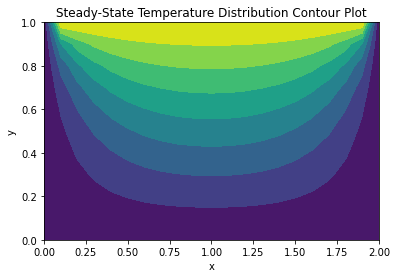

In [ ]:
#Steady State Contour Plot
fig, ax = plt.subplots(1,1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Steady-State Temperature Distribution Contour Plot')
ax.contourf(X, Y, T[:, :])
plt.show()

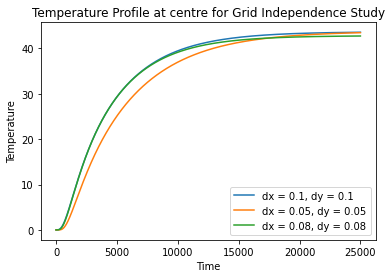

In [ ]:
t = np.linspace(0, t_max, n_t-1)
plt.plot(t, T_centre, label = "dx = " + str(dx) + ", " + "dy = " + str(dy))
plt.plot(t, T_centre1, label = "dx = " + str(dx1) + ", " + "dy = " + str(dy1))
plt.plot(t, T_centre2, label = "dx = " + str(dx2) + ", " + "dy = " + str(dy2))
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Temperature Profile at centre for Grid Independence Study")
# plt.grid()
plt.legend()

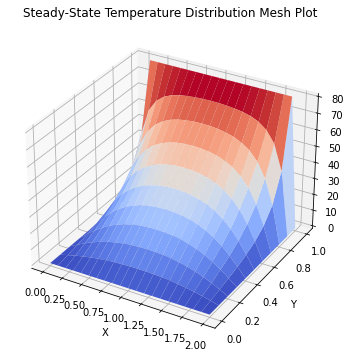

In [ ]:
#Steady State Meshplot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
mycmap = plt.get_cmap('coolwarm')
# ax1.set_title('gist_earth color map')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('T')
ax.plot_surface(X, Y, T, cmap=mycmap)
ax.set_title('Steady-State Temperature Distribution Mesh Plot')


# plt.colorbar()
plt.show()

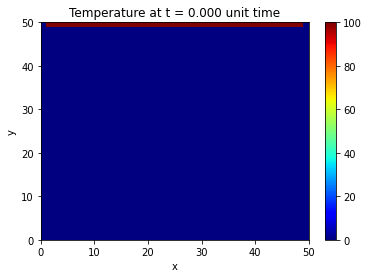

In [ ]:
# We use numpy (for array related operations) and matplotlib (for plotting) 
# because they will help us a lot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

plate_length = 50
max_iter_time = 1000

alpha = 2.0
delta_x = 1

# Calculated params
delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2)

# Initialize solution: the grid of u(k, i, j) 
u = np.empty((max_iter_time, plate_length, plate_length))

# Initial condition everywhere inside the grid
u_initial = 0.0

# Boundary conditions (fixed temperature)
u_top = 100.0
u_left = 0.0
u_bottom = 0.0
u_right = 0.0

# Set the initial condition
u.fill(u_initial)

# Set the boundary conditions
u[:, (plate_length-1):, :] = u_top
u[:, :, :1] = u_left
u[:, :1, 1:] = u_bottom
u[:, :, (plate_length-1):] = u_right

def calculate(u):
  for k in range(0, max_iter_time-1, 1):
    for i in range(1, plate_length-1, delta_x):
      for j in range(1, plate_length-1, delta_x):
        u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]
  
  return u

def plotheatmap(u_k, k):
  # Clear the current plot figure
  plt.clf()
  plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
  plt.xlabel("x")
  plt.ylabel("y")
  
  # This is to plot u_k (u at time-step k)
  plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
  plt.colorbar()
  
  return plt

def animate(k):
  plotheatmap(u[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=True)
anim.save("heat_equation_solution.gif")